# Preliminary exploratory data analysis
This Jupyter notebook will demostrate that the dataset can be read into R and present the data in a tidy format.

## Introduction
It is without a doubt that tennis is a very popular sport all around the world. There are several huge tournaments that occur yearly such as Wimbledon, US Open, and Australian Open. In the data set that we are working with today, it shows the statistics of the top 500 tennis players around the world. We want to analyze and tidy this data set from the original set so there’s a clear and concise set of data to use for our project. In our data set we need to tidy the set by highest rank, so number one comes out first and then second and so on. We want to see what percentage of players who are right handed versus the players who are left handed and where they fall on their rankings.

## Setup

In [2]:
library(tidyverse)
library(repr)
library(stringr)
options(repr.matrix.max.rows = 6)
library(digest)
library(tidymodels)
library(GGally)
library(ISLR)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

## Data Reading

In [3]:
raw_data <- read_csv("player_stats.csv")
raw_data

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



X1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
498,24 (17-05-1995),Ukraine,NA,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Data Wrangling
Because we want to predict the price money of players, so we delete all irrelevant columns like Country, Name, Favorite Surface.
Plus, we delete Rafael Madal(whose current rank is 1) beacuse his price money is tremendously larger than other players(10 times larger than the player just behind him).

In [4]:
set.seed(2000)
tidy_data <- raw_data %>%
             select(Age:Seasons) %>%
             select(-Wikipedia, -'Best Rank', -Country, -Name, -'Favorite Surface') %>%
             mutate(Age = as.integer(str_sub(Age, 1, 2))) %>%
             mutate('Height(cm)' = as.integer(str_sub(Height, 1, 3))) %>%
             select(-Height) %>%
             mutate(`Current Rank` = as.integer(str_remove(string = raw_data$`Current Rank`, pattern = "\\(.*\\)"))) %>%
             mutate(`Prize Money` = as.integer(str_remove_all(string = raw_data$`Prize Money`, pattern = "[a-zA-Z]|\\$|\\,"))) %>%
             mutate(Plays = as.factor(Plays)) %>%
             mutate(Backhand = as.factor(Backhand)) %>%
             filter(`Prize Money` != "NA", Seasons != "NA") %>%
             arrange(`Current Rank`) %>%
             filter(`Current Rank` != 1)
tidy_data
data_split <- initial_split(tidy_data, prop = 0.6, strata = `Prize Money`)
data_training <- training(data_split)
data_testing <- testing(data_split)

Warning message:
“Problem with `mutate()` input `Prize Money`.
ℹ NAs introduced by coercion
ℹ Input `Prize Money` is `as.integer(str_remove_all(string = raw_data$`Prize Money`, pattern = "[a-zA-Z]|\\$|\\,"))`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


Age,Plays,Current Rank,Backhand,Prize Money,Turned Pro,Seasons,Height(cm)
<int>,<fct>,<int>,<fct>,<int>,<dbl>,<dbl>,<int>
23,Right-handed,4,Two-handed,10507693,2014,5,NA
21,Right-handed,6,One-handed,10425605,2016,4,NA
23,Right-handed,8,Two-handed,3580862,2015,3,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
20,Right-handed,492,Two-handed,14811,NA,1,NA
23,Right-handed,494,Two-handed,33471,NA,3,NA
20,Right-handed,499,Two-handed,82547,NA,1,NA


Warning message:
“Removed 157 rows containing missing values (geom_point).”
Warning message:
“Removed 81 rows containing missing values (geom_point).”


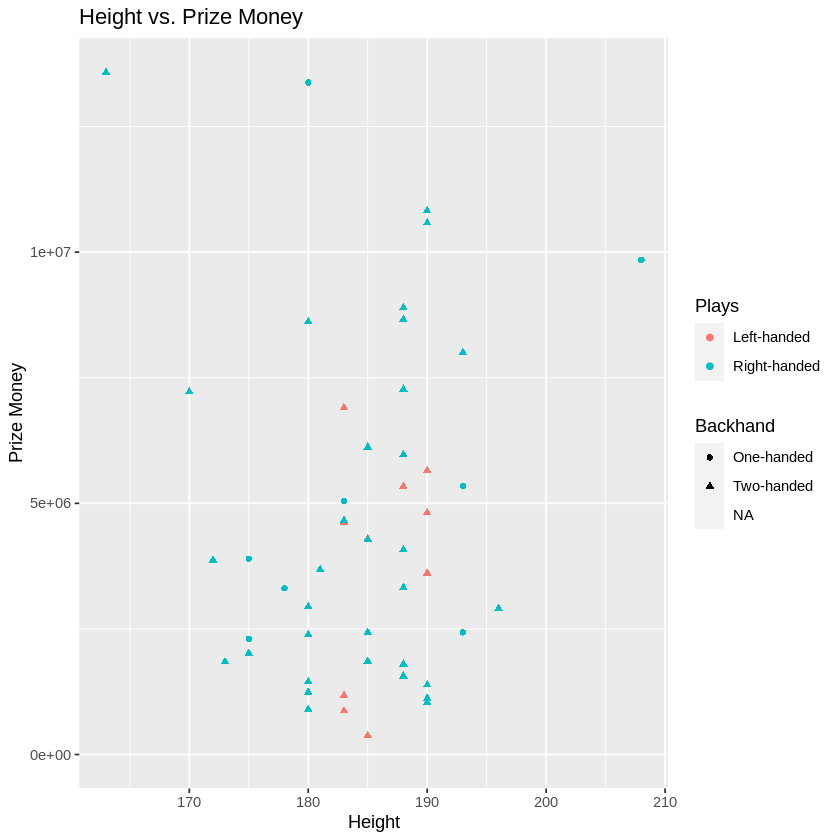

Warning message:
“Removed 4 rows containing missing values (geom_point).”


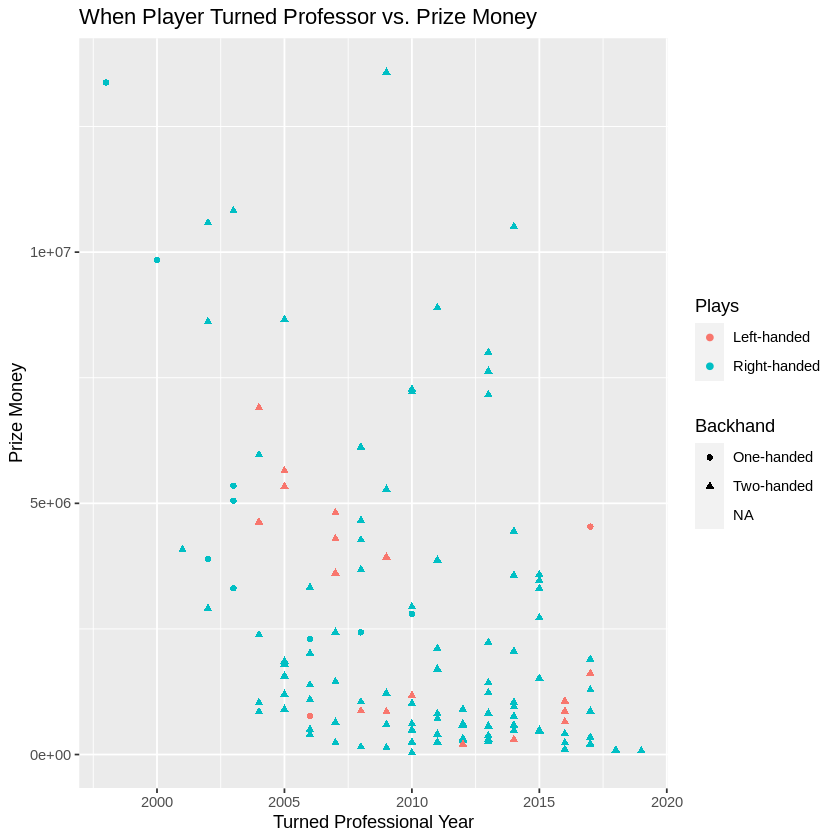

Warning message:
“Removed 4 rows containing missing values (geom_point).”


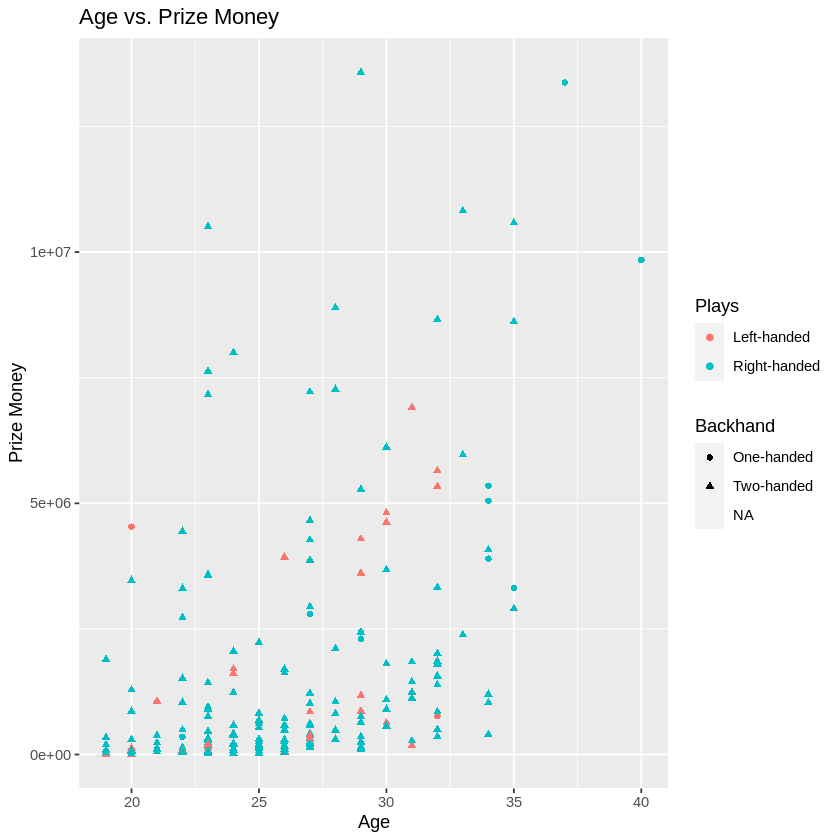

Warning message:
“Removed 4 rows containing missing values (geom_point).”


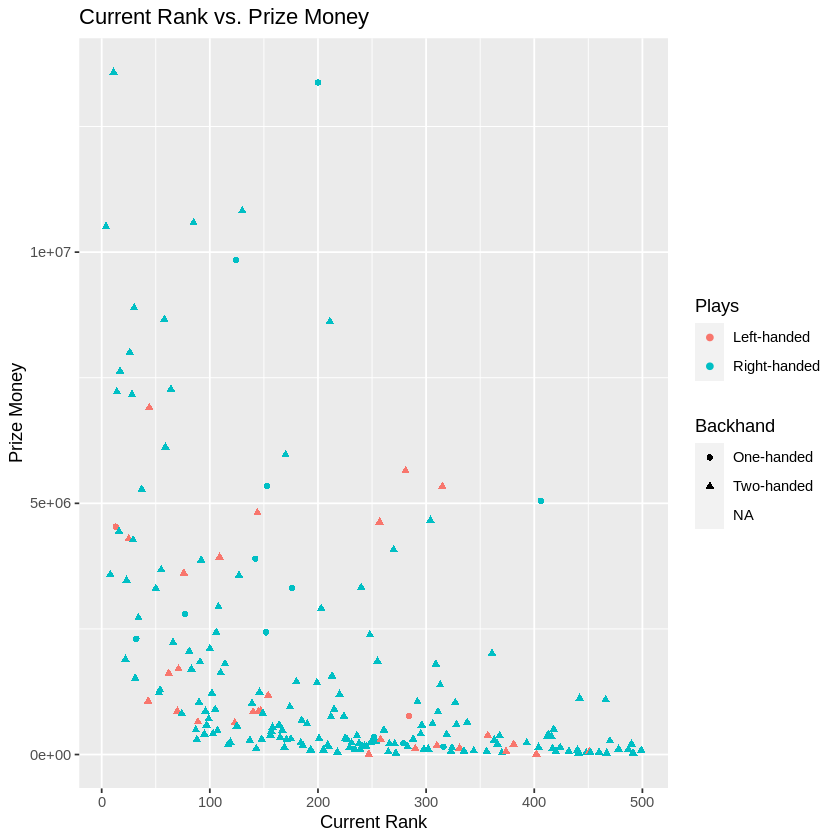

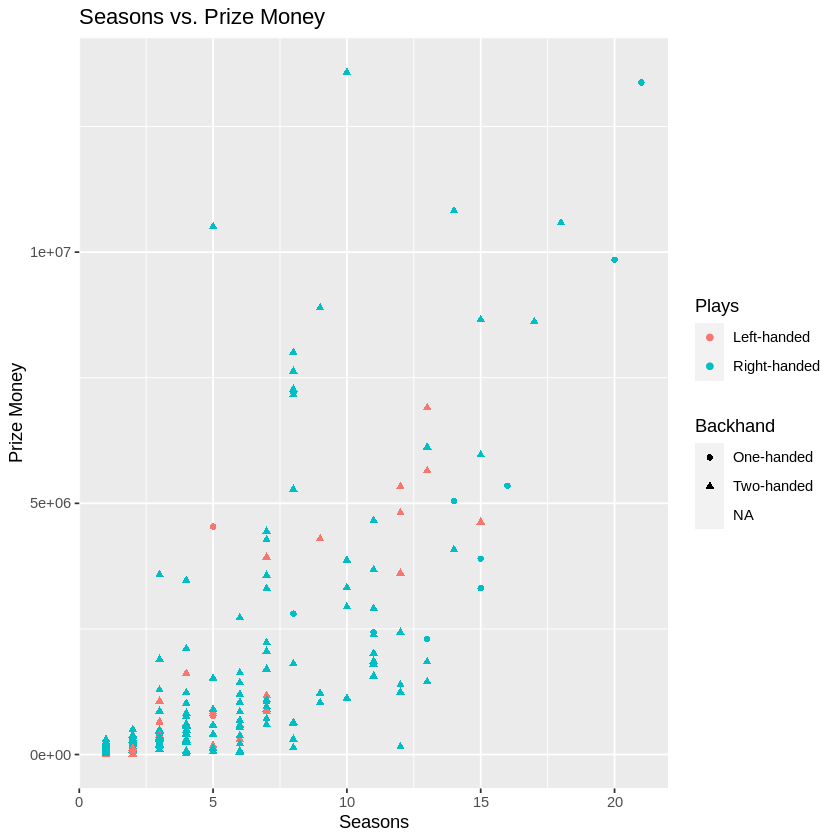

In [5]:
height_momeny_plot <- data_training %>%
    ggplot(aes(x = `Height(cm)`, y = `Prize Money`)) + 
        geom_point(aes(colour = Plays, shape = Backhand)) + 
        labs(x = "Height", y = "Prize Money", colour = "Plays", shape = "Backhand") +
        ggtitle("Height vs. Prize Money")
height_momeny_plot
turnPro_momeny_plot <- data_training %>%
    ggplot(aes(x = `Turned Pro`, y = `Prize Money`)) + 
        geom_point(aes(colour = Plays, shape = Backhand)) + 
        labs(x = "Turned Professional Year", y = "Prize Money", colour = "Plays", shape = "Backhand") +
        ggtitle("When Player Turned Professor vs. Prize Money")
turnPro_momeny_plot
age_momeny_plot <- data_training %>%
    ggplot(aes(x = Age, y = `Prize Money`)) + 
        geom_point(aes(colour = Plays, shape = Backhand)) + 
        labs(x = "Age", y = "Prize Money", colour = "Plays", shape = "Backhand") +
        ggtitle("Age vs. Prize Money")
age_momeny_plot
rank_momeny_plot <- data_training %>%
    ggplot(aes(x = `Current Rank`, y = `Prize Money`)) + 
        geom_point(aes(colour = Plays, shape = Backhand)) + 
        labs(x = "Current Rank", y = "Prize Money", colour = "Plays", shape = "Backhand") +
        ggtitle("Current Rank vs. Prize Money")
rank_momeny_plot
season_momeny_plot <- data_training %>%
    ggplot(aes(x = `Seasons`, y = `Prize Money`)) + 
        geom_point(aes(colour = Plays, shape = Backhand)) + 
        labs(x = "Seasons", y = "Prize Money", colour = "Plays", shape = "Backhand") +
        ggtitle("Seasons vs. Prize Money")
season_momeny_plot

## Predict the price money using Linear regression:

In [6]:

lm_spec <- linear_reg() %>% 
      set_engine("lm") %>%
      set_mode("regression")
data_recipe <-  recipe(`Prize Money` ~ Age + `Current Rank` + `Seasons`, data = data_training)
data_fit <- workflow() %>%
      add_recipe(data_recipe) %>%
      add_model(lm_spec) %>%
      fit(data = data_training)
data_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
   (Intercept)             Age  `Current Rank`         Seasons  
       1293830          -29740           -4948          399945  


$Price\: Money = 1250589 - 21876*Age  - 5665*Current\: Rank + 409933*Seasons$

In [7]:
lm_rmse <- data_fit %>%
        predict(data_training) %>%
        bind_cols(data_training) %>%
        metrics(truth = `Prize Money`, estimate = .pred) %>%
        filter(.metric == "rmse") %>%
        select(.estimate) %>%
        pull()
lm_rmse

[1] 1708237

In [8]:
lm_rmspe <- data_fit %>%
        predict(data_testing) %>%
        bind_cols(data_testing) %>%
        metrics(truth = `Prize Money`, estimate = .pred) %>%
        filter(.metric == "rmse") %>%
        select(.estimate) %>%
        pull()
lm_rmspe

[1] 1851991

In [29]:
set.seed(2000)
data_recipe_scaled <-  recipe(`Prize Money` ~ Age + `Current Rank` + `Seasons`, data = data_training) %>%
                  step_scale(all_predictors()) %>%
                  step_center(all_predictors())
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                  set_engine("kknn") %>%
                  set_mode("regression")
data_fold <- vfold_cv(data_training, v = 5, strata = `Prize Money`)
gridvals <- tibble(neighbors = seq(1,50))
data_workflow <- workflow() %>%
                 add_recipe(data_recipe_scaled) %>%
                 add_model(knn_spec)
result <- data_workflow %>%
                       tune_grid(resamples = data_fold, grid = gridvals) %>%
                       collect_metrics() %>%
                       filter(.metric == 'rmse') %>%
                       filter(mean == min(mean)) %>%
                       select(n) %>%
                       pull()
data_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = result) %>%
                  set_engine("kknn") %>%
                  set_mode("regression")
data_fit <- workflow() %>%
           add_recipe(data_recipe_scaled) %>%
           add_model(data_spec) %>%
           fit(data = data_training)
data_summary <- data_fit %>% 
           predict(data_testing) %>%
           bind_cols(data_testing) %>%
           metrics(truth = `Prize Money`, estimate = .pred) 
knn_rmspe <- data_summary %>%
            filter(.metric == 'rmse') %>%
            select(.estimate) %>%
            pull()
knn_rmspe

[1] 1735815

Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”


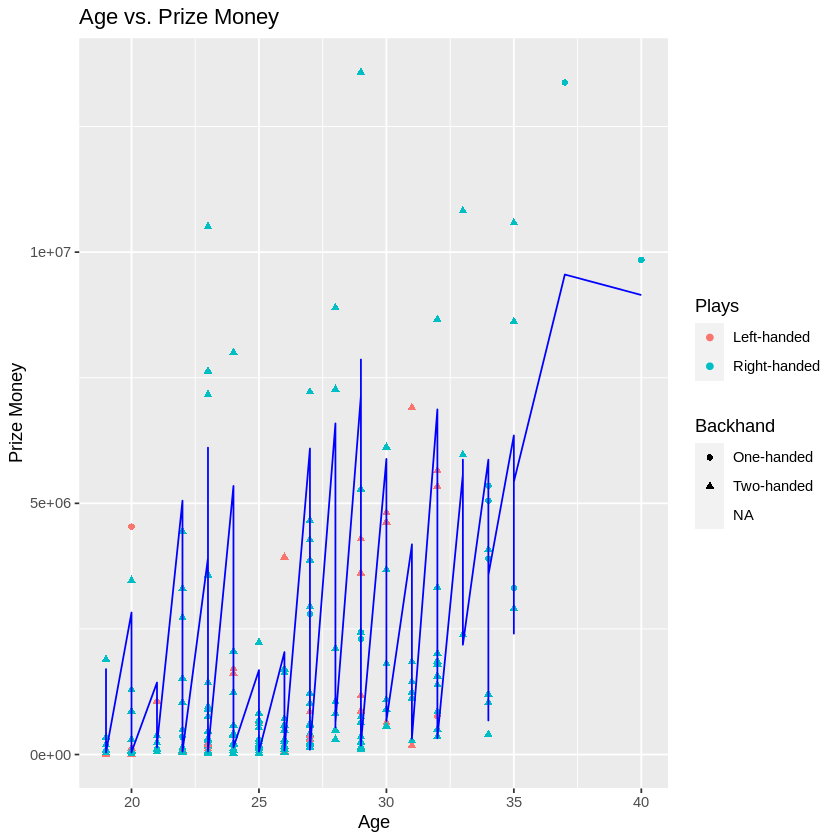

Warning message:
“Removed 4 rows containing missing values (geom_point).”


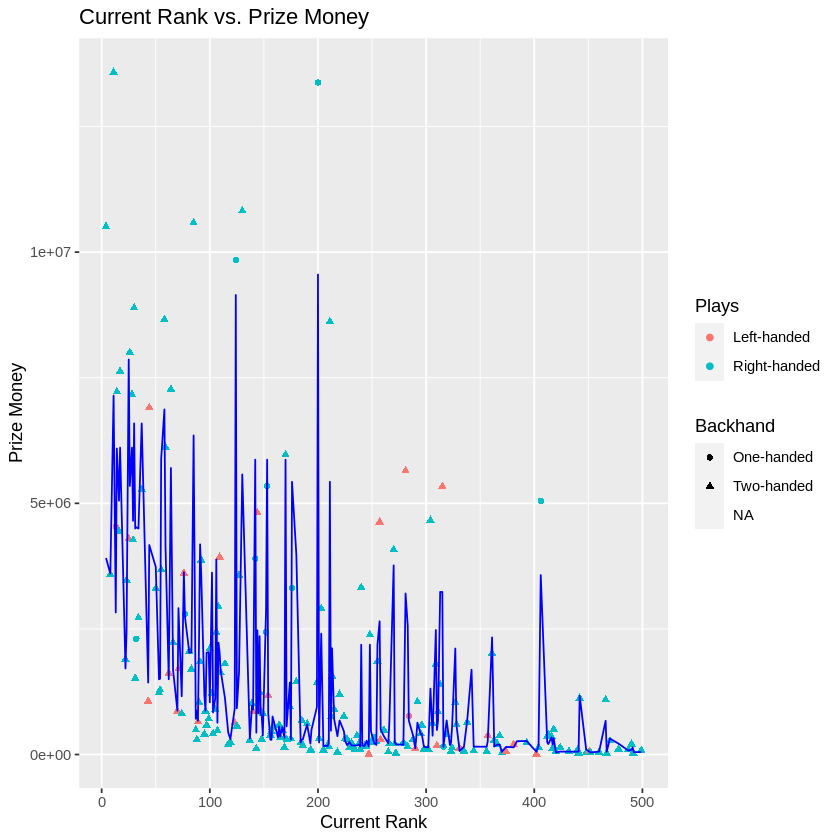

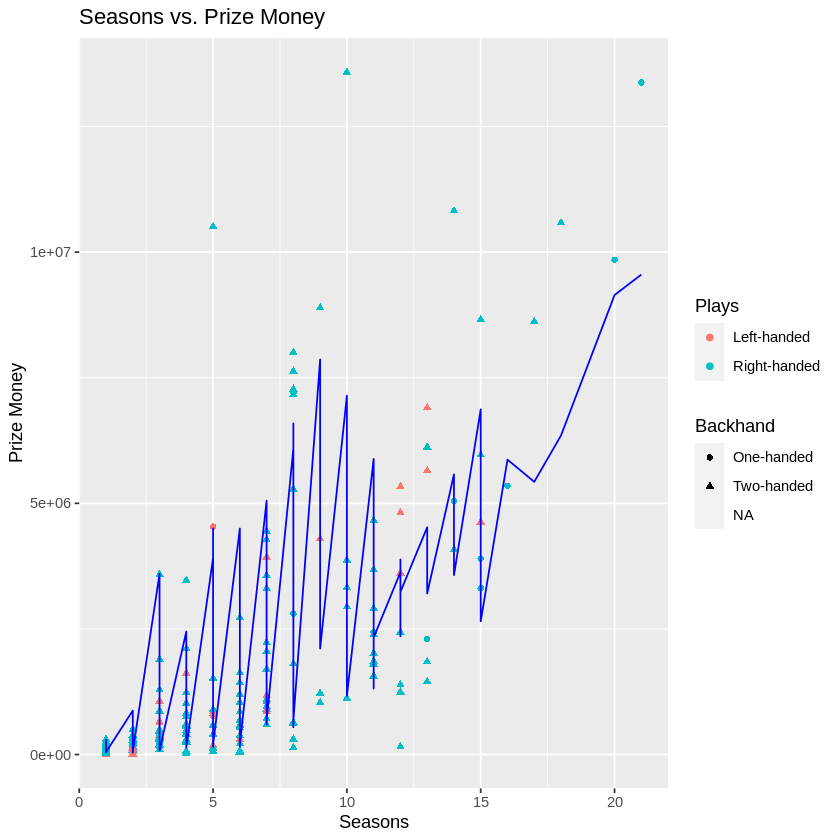

In [30]:
data_preds <- data_fit %>%
       predict(data_training) %>%
       bind_cols(data_training)
age_momeny_regression_plot <- age_momeny_plot +
       geom_line(data = data_preds, mapping = aes(x = Age, y = .pred), color = "blue")
age_momeny_regression_plot
rank_momeny_regression_plot <- rank_momeny_plot +
       geom_line(data = data_preds, mapping = aes(x = `Current Rank`, y = .pred), color = "blue")
rank_momeny_regression_plot
season_momeny_regression_plot <- season_momeny_plot +
       geom_line(data = data_preds, mapping = aes(x = `Seasons`, y = .pred), color = "blue")
season_momeny_regression_plot